# Importing the necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import io
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import accuracy_score

In [0]:
def sigmoid(z):
  return (1/(1 + np.exp(-z)))

In [0]:
def error(a,x1,b,x2,c,y):
  err= 0
  m = len(y)
  for i in range(m):
    f = (a*x1[i]) + (b*x2[i]) + c
    err+= -y[i]*np.log(sigmoid(f)) - (1-y[i]) *np.log(1 -sigmoid(f))

  return err/m

In [0]:
def step_gradient(a,x1,b,x2,c,y,learning_rate):
  grad_a=0
  grad_b=0
  grad_c=0
 
  m = len(y)
  for i in range(m):
    f = (a*x1[i]) + (b*x2[i]) + c
    grad_a+= (sigmoid(f)-y[i])*x1[i]
    grad_b+= (sigmoid(f)-y[i])*x2[i]
    grad_c+= (sigmoid(f)-y[i])
    

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)
 

  return a,b,c

In [0]:
def descend(init_a, x1, init_b, x2, init_c , y, learning_rate, iterations):
  a,b,c = init_a, init_b, init_c
  for i in range(iterations):
    e =error(a,x1,b,x2,c,y)
    if i % 1000 == 0:
      print("Error: %.5f || a: %.5f || b: %.5f || c: %.5f"%(e,a,b,c))
    a,b,c = step_gradient(a,x1,b,x2,c,y,learning_rate)

  return a,b,c

In [0]:
from google.colab import files
uploaded = files.upload()

Saving datatraining.txt to datatraining (2).txt


In [0]:
train_data = pd.read_csv(io.StringIO(uploaded['datatraining.txt'].decode('utf-8')))

In [0]:
uploaded_test = files.upload()

Saving datatest.txt to datatest (2).txt


In [0]:
test_data1 = pd.read_csv(io.StringIO(uploaded_test['datatest.txt'].decode('utf-8')))

In [0]:
uploaded_test2 = files.upload()

Saving datatest2.txt to datatest2 (1).txt


In [0]:
test_data2 = pd.read_csv(io.StringIO(uploaded_test2['datatest2.txt'].decode('utf-8')))

In [0]:
corrdf = train_data.corr('pearson')
corrdf['Occupancy'].sort_values()

Humidity         0.132964
HumidityRatio    0.300282
Temperature      0.538220
CO2              0.712235
Light            0.907352
Occupancy        1.000000
Name: Occupancy, dtype: float64

Picking two features to train the dataset based on the above correlation. Light and CO2 seem to be closely correlated with the target, i.e. Occupancy

In [0]:
f1 = np.array(train_data[['Light']])
f2 = np.array(train_data[['CO2']])
target = np.array(train_data[['Occupancy']])

# Feature Scaling using MinMaxScaler to Normalize all data points
scaler = MinMaxScaler()
f1 = scaler.fit_transform(f1)
f2 = scaler.fit_transform(f2)

In [0]:
f1_test1 = np.array(test_data1[['Light']])
f2_test1 = np.array(test_data1[['CO2']])
target_test1 = np.array(test_data1[['Occupancy']])

scaler = MinMaxScaler()
f1_test1 = scaler.fit_transform(f1_test1)
f2_test1 = scaler.fit_transform(f2_test1)
# target_test1 = scaler.fit_transform(target_test1)

In [0]:
f1_test2 = np.array(test_data2[['Light']])
f2_test2 = np.array(test_data2[['CO2']])
target_test2 = np.array(test_data2[['Occupancy']])

scaler = MinMaxScaler()
f2_test2 = scaler.fit_transform(f2_test2)
# target_test2 = scaler.fit_transform(target_test2)

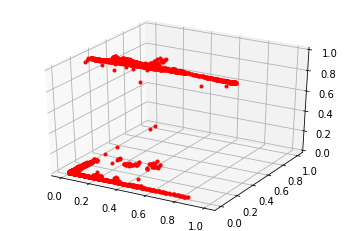

In [55]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.plot(f2.flatten(),f1.flatten(),target.flatten(),'r.')
plt.show()


In [56]:
a = 1
b = 1
c = 1

learning_rate = 0.001
iterations = 5000

fa,fb,fc= descend(a, f1, b, f2, c, target, learning_rate, iterations)

Error: 1.11056 || a: 1.00000 || b: 1.00000 || c: 1.00000
Error: 0.06811 || a: 24.55473 || b: 6.55872 || c: -6.60906
Error: 0.06729 || a: 26.94147 || b: 6.62093 || c: -7.19293
Error: 0.06718 || a: 27.80245 || b: 6.62300 || c: -7.40474
Error: 0.06716 || a: 28.16963 || b: 6.61833 || c: -7.49481


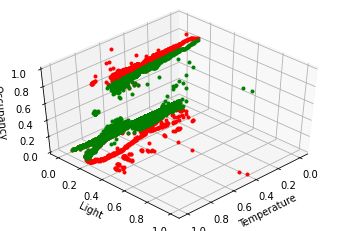

In [0]:
f = fa*f1 + fb*f2 + fc

fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.view_init(45,45)

ax.plot3D(f2.flatten(),f1.flatten(),target.flatten(),'r.')
ax.plot3D(f2.flatten(),f1.flatten(), sigmoid(f).flatten(),'g.')
ax.set_xlabel("CO2")
ax.set_ylabel("Light")
ax.set_zlabel("Occupancy")
plt.show()

In [0]:
def accuracy(a,x1,b,x2,c,y):
  correct = 0
  for i in range(len(y)):
    f = (a*x1[i]) + (b*x2[i]) + c
    prediction = sigmoid(f)
    if prediction > 0.4:
      z = 1
    else:
      z = 0
    if y[i]==z:
      correct+=1

  print("Accuracy: {}".format(correct/len(y)))

In [0]:
accuracy(fa, f1, fb,f2,fc, target)

Accuracy: 0.9864914650620165


In [0]:
accuracy(fa, f1_test1, fb,f2_test1,fc, target_test1)

Accuracy: 0.9789868667917448


In [0]:
accuracy(fa, f1_test2, fb,f2_test2,fc, target_test2)

Accuracy: 0.8248564397046759


After training with two features, the accuracies are as follows:
- Accuracy of train_data : 98.64%
- Accuracy of test_data1 : 97.89%
- Accuracy of test_data2 : 82.48%